In [1]:
import numpy as np
import awkward as ak
import fastjet
import uproot as ur
import matplotlib.colors as mcolors
import mplhep as hep
import matplotlib.pyplot as plt
import math
import matplotlib as colors
import matplotlib as abc
from scipy.optimize import curve_fit
import pandas as pd
from iminuit import Minuit
from iminuit.cost import LeastSquares
import pickle

hep.style.use(hep.style.CMS)
hep.style.use("CMS")
plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

In [15]:
with open('Run22349011_R_0.5_dR_0.25.pickle', 'rb') as handle:
    data_dict = pickle.load(handle)
with open('Pythia6Reco_R_0.5_dR_0.25.pickle', 'rb') as handle:
    sim_dict = pickle.load(handle)


In [3]:
def eta(r, z):
    theta = abs(np.arctan(r / z))
    result = np.where(z < 0, np.log(np.tan(theta / 2)), -1 * np.log(np.tan(theta / 2)))
    return result

def phi(x,y):
    return np.arctan2(y, x)

def momentum_xyz(px, py, pz):
    norm = np.sqrt(px**2 + py**2 + pz**2)
    x = px / norm
    y = py / norm
    z = pz / norm
    return x, y, z

def cart_components(P, eta, phi):
    theta = 2 * np.arctan(np.exp(eta))
    pz = P * np.cos(theta)
    r = P * np.sin(theta)
    px = r * np.cos(phi)
    py = r * np.sin(phi)
    pz = np.where(eta > 0, np.abs(pz), -1*np.abs(pz))
    return px, py, pz

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


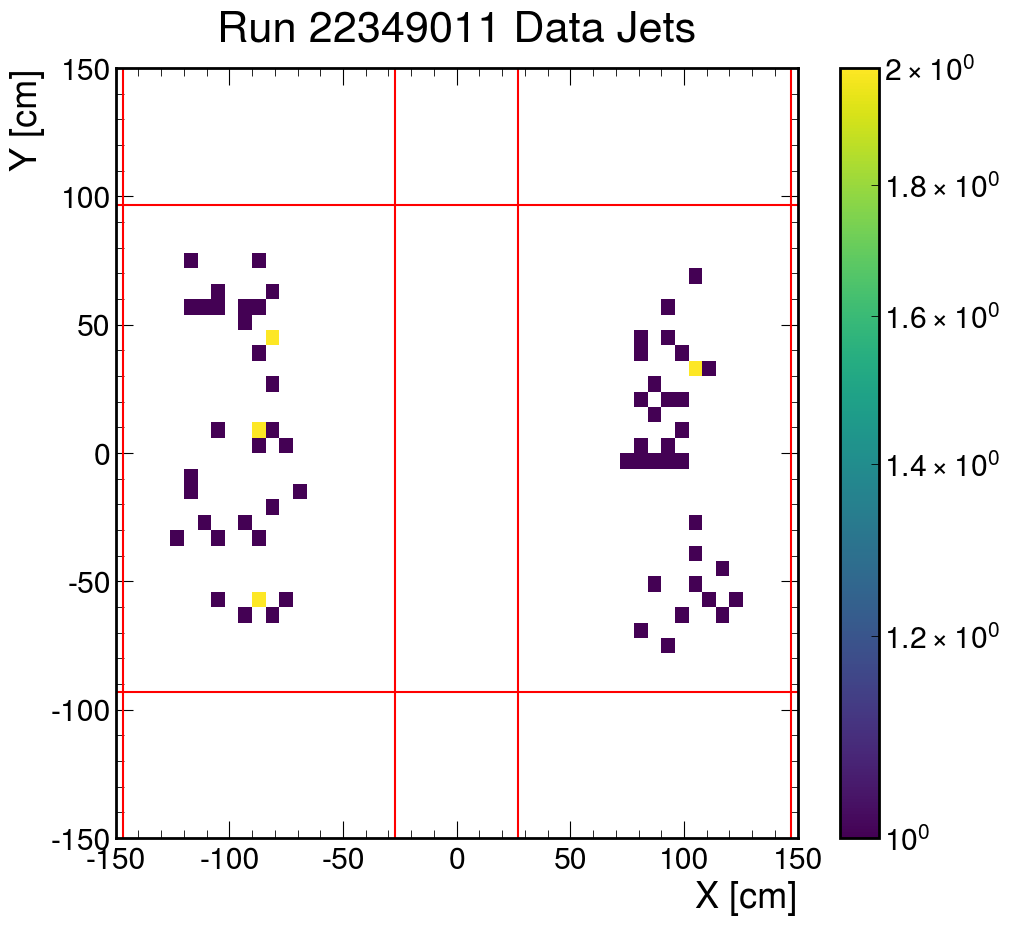

In [8]:
fig = plt.figure(figsize=(11,10))

JetPX, JetPY, JetPZ = cart_components(reco_dict["energy"], reco_dict["eta"], reco_dict["phi"])
JetPX, JetPY, JetPZ = momentum_xyz(JetPX, JetPY, JetPZ)
jetXE = 724 * JetPX / JetPZ
jetYE = 724 * JetPY / JetPZ


plt.hist2d(np.array(ak.flatten(jetXE)),np.array(ak.flatten(jetYE)),bins=(50,50),range=([-150,150],[-150,150]),cmap='viridis',norm=abc.colors.LogNorm())
cbar = plt.colorbar()
plt.axvline(-146.85802,color='red')
plt.axvline(146.85802,color='red')
plt.axvline(-27.032663,color='red')
plt.axvline(27.032663,color='red')
plt.axhline(-93.104996,color='red')
plt.axhline(96.704994,color='red')

plt.legend(loc='upper left')
plt.xlabel('X [cm]')
plt.ylabel('Y [cm]')
plt.title("Run 22349011 Data Jets",pad = 20.0)
plt.show()

Text(0, 1, 'Norm. Count')

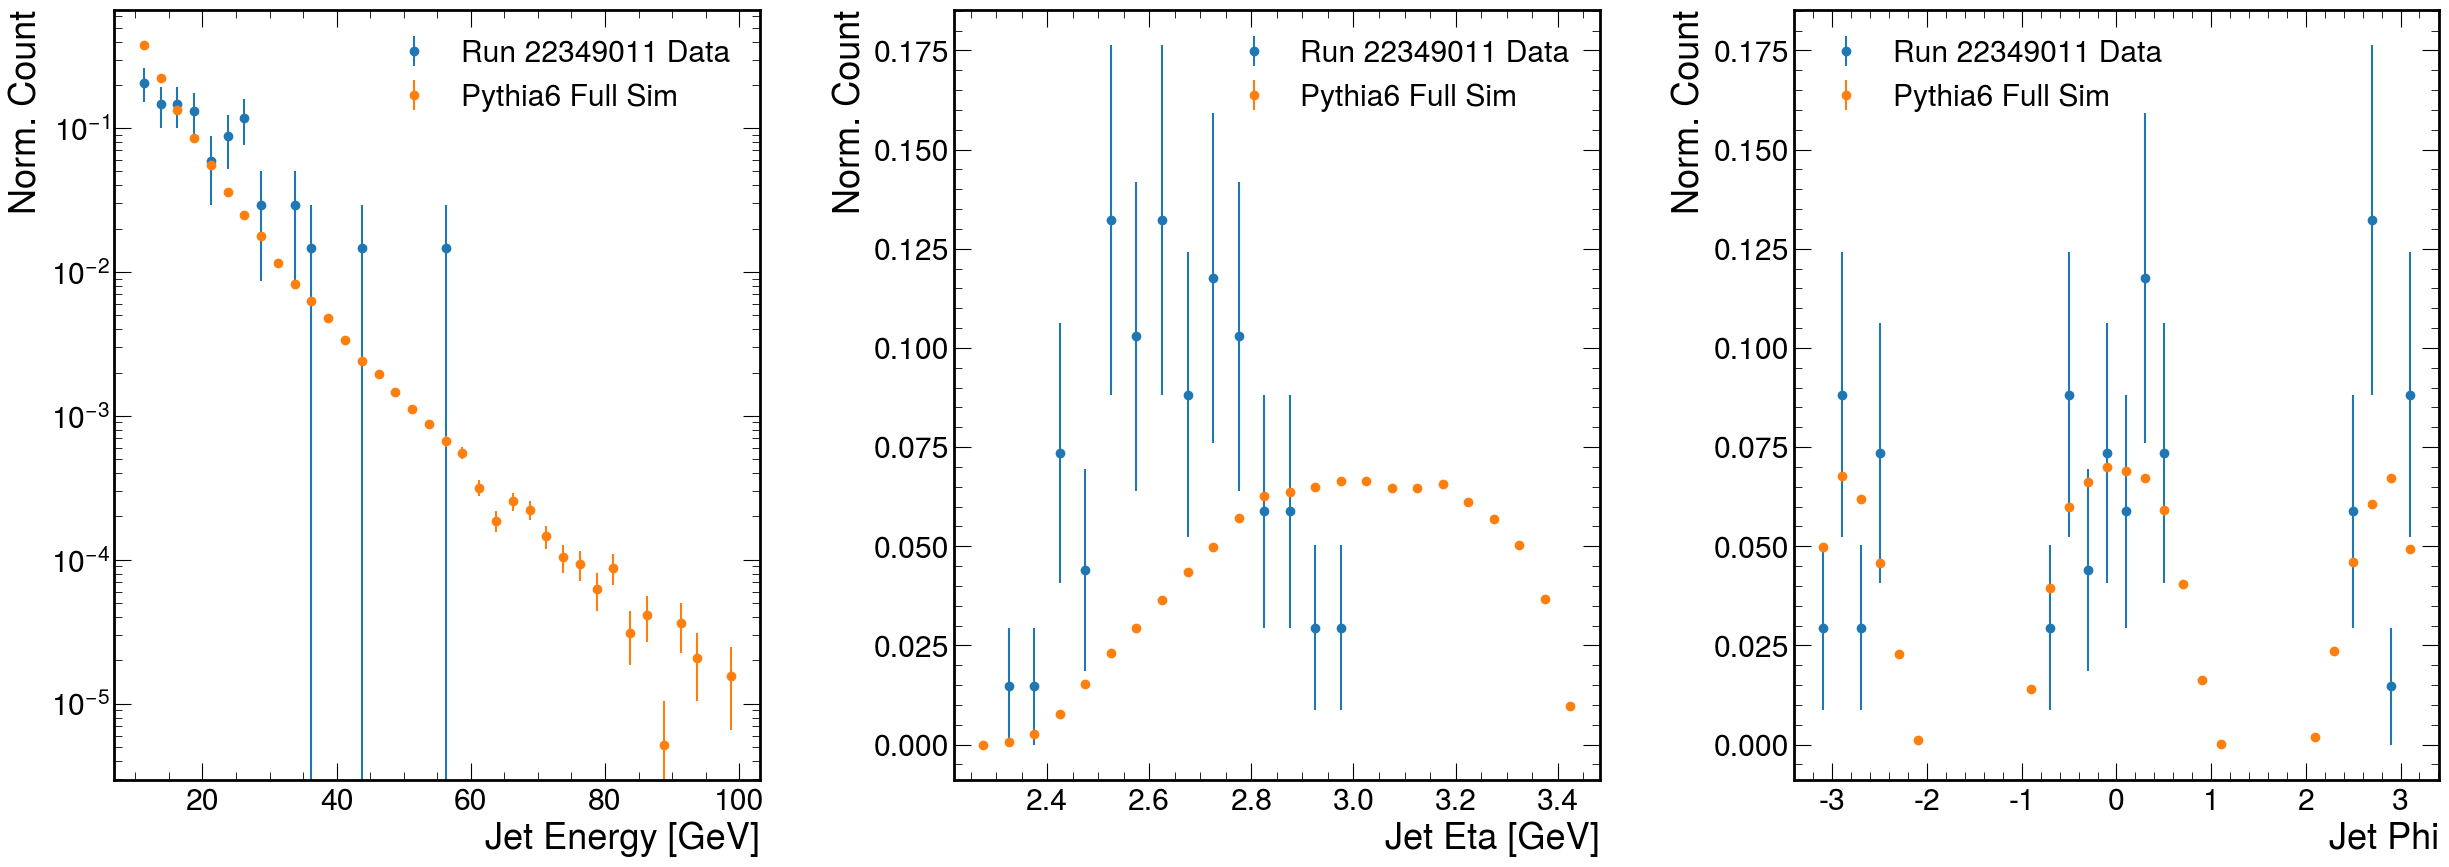

In [25]:


fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 10), gridspec_kw={'wspace': 0.3,'hspace': 0.3})

plt.sca(axs[0])


hist, bin_edges = np.histogram(ak.flatten(data_dict["energy"]),range=(0,100),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
zerocut = (hist > 0)
errs = np.sqrt(hist[zerocut]) / np.sum(hist[zerocut])
hist = hist[zerocut] / np.sum(hist[zerocut])
bins = bin_centres[zerocut]

plt.errorbar(np.array(bins),np.array(hist),yerr=errs,fmt="o", label="Run 22349011 Data")

hist, bin_edges = np.histogram(ak.flatten(sim_dict["energy"]),range=(0,100),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
zerocut = (hist > 0)
errs = np.sqrt(hist[zerocut]) / np.sum(hist[zerocut])
hist = hist[zerocut] / np.sum(hist[zerocut])
bins = bin_centres[zerocut]

plt.errorbar(np.array(bins),np.array(hist),yerr=errs,fmt="o", label="Pythia6 Full Sim")

plt.legend()

plt.yscale("log")
plt.xlabel('Jet Energy [GeV]')
plt.ylabel('Norm. Count')


plt.sca(axs[1])


hist, bin_edges = np.histogram(ak.flatten(data_dict["eta"]),range=(2,4),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
zerocut = (hist > 0)
errs = np.sqrt(hist[zerocut]) / np.sum(hist[zerocut])
hist = hist[zerocut] / np.sum(hist[zerocut])
bins = bin_centres[zerocut]

plt.errorbar(np.array(bins),np.array(hist),yerr=errs,fmt="o", label="Run 22349011 Data")

hist, bin_edges = np.histogram(ak.flatten(sim_dict["eta"]),range=(2,4),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
zerocut = (hist > 0)
errs = np.sqrt(hist[zerocut]) / np.sum(hist[zerocut])
hist = hist[zerocut] / np.sum(hist[zerocut])
bins = bin_centres[zerocut]

plt.errorbar(np.array(bins),np.array(hist),yerr=errs,fmt="o", label="Pythia6 Full Sim")



plt.legend(loc='upper right')


plt.xlabel('Jet Eta [GeV]')
plt.ylabel('Norm. Count')



plt.sca(axs[2])



hist, bin_edges = np.histogram(ak.flatten(data_dict["phi"]),range=(-4,4),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
zerocut = (hist > 0)
errs = np.sqrt(hist[zerocut]) / np.sum(hist[zerocut])
hist = hist[zerocut] / np.sum(hist[zerocut])
bins = bin_centres[zerocut]

plt.errorbar(np.array(bins),np.array(hist),yerr=errs,fmt="o", label="Run 22349011 Data")

hist, bin_edges = np.histogram(ak.flatten(sim_dict["phi"]),range=(-4,4),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
zerocut = (hist > 0)
errs = np.sqrt(hist[zerocut]) / np.sum(hist[zerocut])
hist = hist[zerocut] / np.sum(hist[zerocut])
bins = bin_centres[zerocut]

plt.errorbar(np.array(bins),np.array(hist),yerr=errs,fmt="o", label="Pythia6 Full Sim")

plt.legend(loc="upper left")

plt.xlabel('Jet Phi')
plt.ylabel('Norm. Count')

